## What is scikit-learn?

Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python.


## Data in scikit-learn

Data in scikit-learn, with very few exceptions, is assumed to be stored as a two-dimensional array, of shape \[n_samples, n_features\].

- **n_samples** : The number of samples: each sample is an item to process (e.g. classify). A sample can be a document, a picture, a sound, a video, a row in database or CSV file, or whatever you can describe with a fixed set of quantitative traits.

- **n_features** : The number of features or distinct traits that can be used to describe each item in a quantitative manner. Features are generally real-valued, but may be Boolean or discrete-valued in some cases.



## General Machine Learning Steps

1. Data collection, preprocessing (e.g., integration, cleaning, etc.), and exploration:
    - Split a dataset into the training and testing datasets
2. Model development:
    - Assume a model $\mathcal F: \{f_1, f_2, \cdots \}$ that is a collection of candidate functions  $\mathcal f$ Let's assume that each  $\mathcal f$ is parametrized by $\mathcal w$.
    - Define a cost function $\mathcal C(w)$ that measures "how good a particular $\mathcal f$ can explain the training data". The lower the cost function the better.
3. Training: employ an algorithm that finds the best (or good enough) function $\mathcal f^∗$ in the model that minimizes the cost function over the training dataset
4. Testing: evaluate the performance of the learned $\mathcal f^∗$ using the testing dataset.
5. Apply the model in the real world.

> The data is presented to the algorithm usually as a two-dimensional array (or matrix) of numbers. Each data point (also known as a sample or training instance) that we want to either learn from or make a decision on is represented as a list of numbers, a so-called feature vector, and its containing features represent the properties of this point.

> In classification, the label is discrete, such as "spam" or "no spam". In other words, it provides a clear-cut distinction between categories. Furthermore, it is important to note that class labels are nominal, not ordinal variables. Nominal and ordinal variables are both subcategories of categorical variable. Ordinal variables imply an order, for example, T-shirt sizes "XL > L > M > S". On the contrary, nominal variables don't imply an order, for example, we (usually) can't assume "orange > blue > green".

## Cat classifier - Reference to Andrew Ng's course on coursera.
- 0 : non-cat
- 1 : cat


In [1]:
%matplotlib inline
import numpy as np
import sklearn
import matplotlib.pyplot as plt

train_X = np.load('train_X.npy')
train_Y = np.load('train_Y.npy')
test_X = np.load('test_X.npy')
test_Y = np.load('test_Y.npy')


print("train_X shape: {}".format(train_X.shape))
print("train_Y shape: {}".format(train_Y.shape))
print("test_X shape: {}".format(test_X.shape))
print("test_Y shape: {}".format(test_Y.shape))
#print(train_X[0])

train_X shape: (209, 64, 64, 3)
train_Y shape: (209,)
test_X shape: (50, 64, 64, 3)
test_Y shape: (50,)


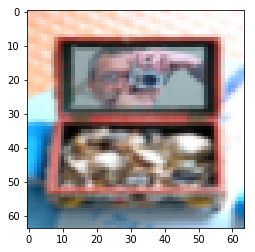

In [4]:
# Feel free to change the index
index = 15
plt.imshow(train_X[index])

In [ ]:
# Reshape the training and test data sets so that images of size (64, 64, 3) are flattened into single 
# vectors of shape (64 * 64 * 3, 1).
num_train = train_X.shape[0]
num_test = test_X.shape[0]
flatten_train_X = train_X.reshape(num_train,-1)
flatten_test_X = test_X.reshape(num_test, -1)

print("Flatten train_X shape: {}".format(flatten_train_X.shape))
print("Flatten test_X shape: {}".format(flatten_test_X.shape))
#print(flatten_train_X[0,:10])

# To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the 
# pixel value is actually a vector of three numbers ranging from 0 to 255.
# One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract 
# the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole 
# numpy array. 
#
# But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the 
# dataset by 255 (the maximum value of a pixel channel).
norm_train_X = flatten_train_X / 255
norm_test_X = flatten_test_X / 255


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(norm_train_X, train_Y)
print(clf.score(norm_train_X, train_Y))
print(clf.score(norm_test_X, test_Y))

In [ ]:
index = 25
print("Model prediction: {}".format(clf.predict(norm_test_X[index].reshape(1,-1))))
plt.imshow(test_X[index])

##  [Kaggle - Pokémon for Data Mining and Machine Learning](https://www.kaggle.com/alopez247/pokemon)

- Pandas basic usage

In [1]:
import pandas as pd
df = pd.read_csv('pokemon_alopez247.csv')
print("Classes of type_1: {}".format(df['Type_1'].unique()))
print("Classes of Body_Style: {}".format(df['Body_Style'].unique()))
df.head(5)

Classes of type_1: ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground' 'Fairy'
 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel' 'Flying']
Classes of Body_Style: ['quadruped' 'bipedal_tailed' 'insectoid' 'serpentine_body' 'four_wings'
 'two_wings' 'bipedal_tailless' 'head_legs' 'head_base' 'multiple_bodies'
 'several_limbs' 'head_arms' 'with_fins' 'head_only']


,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


## Convert Categorical Features to Numeric Features

- **Ordinal Values**
> Generation
- **Nominal Values**
> Color, Type

In [ ]:
# Ground + Rock, Flying + Fairy + Dragon, Poison + Ghost + Dark, Water + Ice, Fighting + Psychic + Steel
mapping_dictionary = {"Type_1":{ 'Grass': 1, 'Fire': 2, 'Water': 3, 'Bug': 4, 'Normal': 5, 'Poison': 6, 'Electric': 7, 'Ground': 8, 'Fairy': 9, 
 'Fighting': 10, 'Psychic': 10, 'Rock': 8, 'Ghost': 6, 'Ice': 3, 'Dragon': 9, 'Dark':6, 'Steel': 10, 'Flying': 9}}
df = df.replace(mapping_dictionary)
df["isLegendary"] = df["isLegendary"].astype(int) # Boolean to int
df["hasMegaEvolution"] = df["hasMegaEvolution"].astype(int)

dummy_df = pd.get_dummies(df['Color'])  ## one-hot encoding
df = pd.concat([df, dummy_df], axis=1)
df = df.drop('Color', axis=1)
df.head(5)

In [ ]:
df.describe() # description of the dataset only for numeric feature

In [ ]:
# Data shape
df.shape

In [ ]:
## drop column because it if irrelevant to the results
   
df = df.drop(['Number','Name', 'Type_2', 'Egg_Group_1', 'Egg_Group_2', 'hasGender', 'Body_Style'],axis=1)
df.head(5)

In [3]:
# Data shape after drop column
df.shape

(721, 23)

In [2]:
df['Type_1'].value_counts() # classes count of type_1

Water       105
Normal       93
Grass        66
Bug          63
Psychic      47
Fire         47
Rock         41
Electric     36
Ground       30
Poison       28
Dark         28
Fighting     25
Dragon       24
Ghost        23
Ice          23
Steel        22
Fairy        17
Flying        3
Name: Type_1, dtype: int64

## Missing value

There are many methods to deal with missing value such as dorpping the feature/sample, or giving values by zero/column mean/interpolation. There is not always right way to do, it depends upon your domain knowledge or experiences.

In [ ]:
## Missing value
print(df.isnull().sum()) # Pr_Male has 77 missing value
df.dropna(axis=1, inplace=True)
df.shape

In [4]:
# We need all features are numeric, check if there still has dtype = object
df.dtypes.value_counts()

int64      10
object      7
bool        3
float64     3
dtype: int64

In [ ]:
# Finally check whether all features are done by the steps we described above.
df.info()

In [ ]:
## Also you can draw histgram using pandas
df[['HP', 'Attack']].plot.hist(alpha=0.5)

In [ ]:
## Split data
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

def get_arrays(df):
    X = np.array(df.iloc[:,1:])
    y = np.array(df['Type_1'])
    return X, y


In [ ]:
train_X, train_Y = get_arrays(df_train)
test_X, test_Y = get_arrays(df_test)
scaler = StandardScaler()
svc = SVC(C=5, gamma=0.04)
clf = Pipeline([('scaler', scaler), ('svc', svc)])
clf.fit(train_X, train_Y)
print("Accuracy: {}".format(clf.score(train_X, train_Y)))
print("Accuracy: {}".format(clf.score(test_X, test_Y)))

## Exercise - Build a classifier on stock data (predict a stock will rise(1) or not(0))

- Load the data in the stock directory.
- Choose a classifier in sklearn package(SVC, decision tree, KNN, MLP, etc.)
- Make the predictions on test data and report the results.
- Raw data is in "/home/mlb/res/stock/twse/raw/"  or json data is in "/home/mlb/res/stock/twse/json/"
- Feature set consists of thirty features(six features each day, high price, low price, open price, close price, adjust close, volume).

In [ ]:
stock_train_X = np.load('stock/train_X.npy') # train 2017-05-01 ~ 2017-05-31
stock_train_Y = np.load('stock/train_Y.npy')
stock_test_X = np.load('stock/test_X.npy') # test 2017-06-01 ~ 2017-06-30
stock_test_Y = np.load('stock/test_Y.npy')
print(stock_train_X[:5])
print(stock_train_Y[:5])

# Reference to  Andrew Ng, Professor Lin 's course on coursera and Professor Wu in NTHU.